<a href="https://colab.research.google.com/github/adityaas05/Portofolio/blob/main/Marketing%20Analysis/Cohort%20Analysis/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction📄
Cohort Analysis is a method used in analytics and business intelligence to group customers or users into cohorts based on shared characteristics or experiences within a defined time-span. These cohorts are then tracked over time to observe changes in behavior, usage, or other key metrics.

The provided dataset contains user interaction data, including metrics such as the number of new and returning users, and their engagement durations on Day 1 and Day 7. The data is structured with dates, allowing for time-series analysis. Key columns in the dataset are:

*   Date: The specific dates of user interactions.
*   New Users: The count of new users for each date.
*   Returning Users: The count of users returning on each date.
*   Duration Day 1: The average duration (possibly in minutes or seconds) of user interaction on their first day.
*   Duration Day 7: The average duration of user interaction on their seventh day.

Task❗
*   Identify trends in the acquisition of new users and the retention of returning users on a weekly basis.
*  Understand how user engagement, as indicated by the average duration of interaction, evolves from the first day to the seventh day of usage.
*   Detect any significant weekly patterns or anomalies in user behavior and engagement, and investigate the potential causes behind these trends.
*   Explore the relationship between user retention (returning users) and engagement (duration metrics), to assess the effectiveness of user engagement strategies.
*   Provide actionable insights that can guide marketing efforts, content strategies, and user experience improvements.

# Import Dataset & Library

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vROrf23F8gu4-0qCEWNeghgy9Lf-KLPp3134F42dpvltmbN7OmSHR_bdbbe7gJcDg/pub?output=csv")
print(data.head())

         Date  New users  Returning users Duration Day 1 Duration Day 7
0  10/25/2023       3461             1437    202,1569767    162,5238095
1  10/26/2023       3777             1554    228,6319444    258,1470588
2  10/27/2023       3100             1288    227,1858407         233,55
3  10/28/2023       2293              978    261,0795455    167,3571429
4  10/29/2023       2678             1082    182,5675676         304,35


In [19]:
# Check whether the dataset has any null values or not:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [20]:
# Datatypes of all the columns in the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             30 non-null     object
 1   New users        30 non-null     int64 
 2   Returning users  30 non-null     int64 
 3   Duration Day 1   30 non-null     object
 4   Duration Day 7   30 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [21]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Convert 'Duration' column to float format
data['Duration Day 1'] = data['Duration Day 1'].str.replace(',', '.').astype(float)
data['Duration Day 7'] = data['Duration Day 7'].str.replace(',', '.').astype(float)

# Exploratory Data Analysis (EDA)📊

In [22]:
# Display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


*   **New Users**: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.
*   **Returning Users**: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.
*   **Duration Day 1**: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
*   **Duration Day 7**: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.

In [23]:
# Trend analysis for New and Returning Users
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')
fig.show()

In [24]:
# Trend of duration over time:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-0))
fig.show()

<ipython-input-26-0adb872275a4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



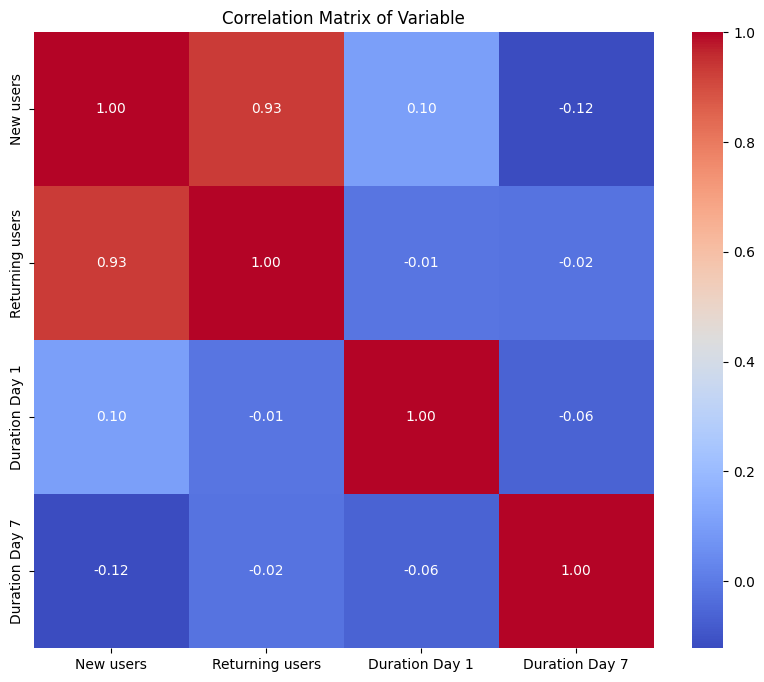

In [26]:
# Correlation between the variables:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variable')
plt.show()

Strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

In [27]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()
print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


In [28]:
# Weekly average of the new and returning users and the duration:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

*   Average number of new users.
*   Average number of returning users.
*   Average duration on Day 1.
*   Average duration on Day 7.







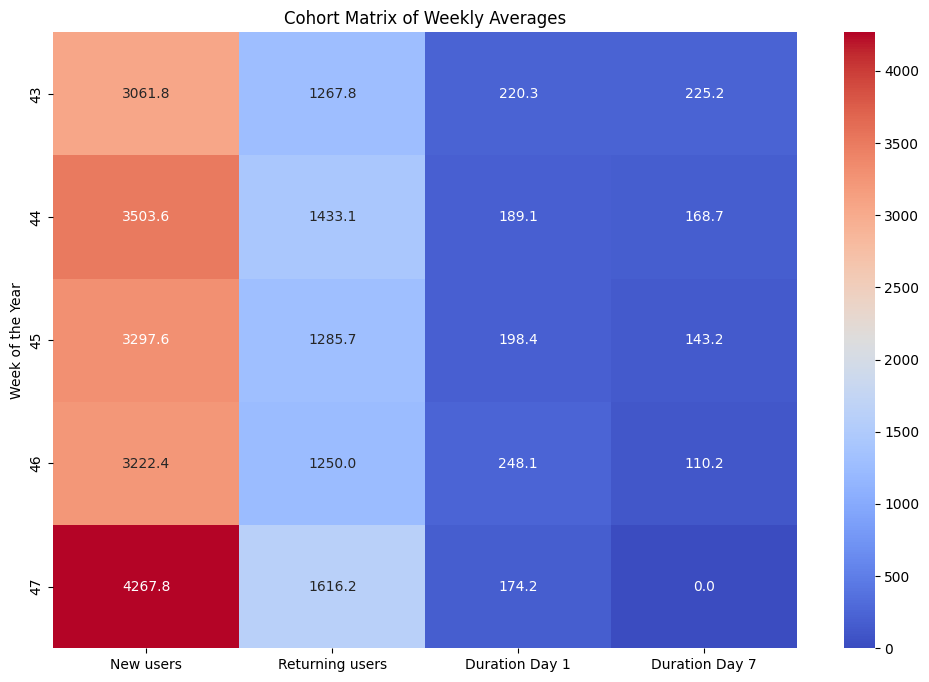

In [29]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.

# Summary📃
Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way.